# How do you like them apps?

---

In [1]:
import os
import plaid
import requests
import datetime
import json
import pandas as pd
%matplotlib inline

def pretty_print_response(response):
  print(json.dumps(response, indent=4, sort_keys=True))


PLAID_CLIENT_ID = os.getenv('PLAID_CLIENT_ID')
PLAID_SECRET = os.getenv('PLAID_SECRET')
PLAID_PUBLIC_KEY = os.getenv('PLAID_PUBLIC_KEY')
PLAID_ENV = os.getenv('PLAID_ENV', 'sandbox')
PLAID_PRODUCTS = os.getenv('PLAID_PRODUCTS', 'transactions')

# Plaid access token

---

In [2]:
# Creating a client to connect to plaid
INSTITUTION_ID = "ins_109508"
client = plaid.Client(client_id=PLAID_CLIENT_ID, secret=PLAID_SECRET, public_key=PLAID_PUBLIC_KEY, environment='sandbox')
# Generating a public token
public_token_response = client.Sandbox.public_token.create(INSTITUTION_ID, ['transactions','income','assets'])
# Exchanging public token for a access token
exchange_response = client.Item.public_token.exchange(public_token_response['public_token'])
# Storing access token
access_token = exchange_response['access_token']
# Getting the accounts associated with "ins_109508"
client.Accounts.get(access_token)

{'accounts': [{'account_id': 'nWrl1R3lvjhJgbdKL9rbhR3v9MBjopf6W8JbG',
   'balances': {'available': 100,
    'current': 110,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '0000',
   'name': 'Plaid Checking',
   'official_name': 'Plaid Gold Standard 0% Interest Checking',
   'subtype': 'checking',
   'type': 'depository'},
  {'account_id': 'b7MkQD9kZqu8n1y4dk71fjQ6WgDZ4zcVZGBqz',
   'balances': {'available': 200,
    'current': 210,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '1111',
   'name': 'Plaid Saving',
   'official_name': 'Plaid Silver Standard 0.1% Interest Saving',
   'subtype': 'savings',
   'type': 'depository'},
  {'account_id': 'mEKRZMBRvPFjdbyq1xKbHAXR8B5D1WsLd7rJ9',
   'balances': {'available': None,
    'current': 1000,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '2222',
   'name': 'Plaid CD',
   'officia

# Account transactions with Plaid

---

In [3]:
# Getting transactions for specific date range
start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-90))
end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now())
# Getting transactions
new_transactions = client.Transactions.get(access_token,start_date,end_date)
# Printing out those transactions
print(json.dumps(new_transactions['transactions'],indent=4, sort_keys=True))

[
    {
        "account_id": "b7MkQD9kZqu8n1y4dk71fjQ6WgDZ4zcVZGBqz",
        "account_owner": null,
        "amount": 25,
        "authorized_date": null,
        "category": [
            "Payment",
            "Credit Card"
        ],
        "category_id": "16001000",
        "date": "2020-04-15",
        "iso_currency_code": "USD",
        "location": {
            "address": null,
            "city": null,
            "country": null,
            "lat": null,
            "lon": null,
            "postal_code": null,
            "region": null,
            "store_number": null
        },
        "name": "CREDIT CARD 3333 PAYMENT *//",
        "payment_channel": "other",
        "payment_meta": {
            "by_order_of": null,
            "payee": null,
            "payer": null,
            "payment_method": null,
            "payment_processor": null,
            "ppd_id": null,
            "reason": null,
            "reference_number": null
        },
        "pending": fals

In [4]:
# Getting the category names
transaction = new_transactions['transactions']
categories = []
for transaction in transaction:
    category = transaction['category'][0]
    categories.append(category)
    print(category)

Payment
Travel
Transfer
Transfer
Recreation
Travel
Food and Drink
Food and Drink
Food and Drink
Transfer
Travel
Travel
Food and Drink
Payment
Food and Drink
Shops
Payment
Travel
Transfer
Transfer
Recreation
Travel
Food and Drink
Food and Drink
Food and Drink
Transfer
Travel
Travel
Food and Drink
Payment
Food and Drink
Shops
Payment
Travel
Transfer
Transfer
Recreation
Travel
Food and Drink
Food and Drink
Food and Drink
Transfer
Travel
Travel
Food and Drink
Payment
Food and Drink
Shops


In [5]:
# Creating a new dataframe with date, POI, amount, and category
transaction = new_transactions['transactions']
categories = []
dates = []
poi = []
amount =[]

for transaction in transaction:
    categories.append(category)
    category = transaction['category'][0]
    dates.append(transaction['date'])
    poi.append(transaction['name'])
    amount.append(transaction['amount'])
    
for i in range(len(dates)):
    print(f"{dates[i]} {poi[i]} \t ${amount[i]} Cat: {categories[i]}")

df = pd.DataFrame(list(zip(dates,poi,amount,categories)), 
                columns =['Date','Transaction','Amount','Category'])
df.head()

2020-04-15 CREDIT CARD 3333 PAYMENT *// 	 $25 Cat: Shops
2020-04-15 Uber 	 $5.4 Cat: Payment
2020-04-14 ACH Electronic CreditGUSTO PAY 123456 	 $5850 Cat: Travel
2020-04-14 CD DEPOSIT .INITIAL. 	 $1000 Cat: Transfer
2020-04-13 Touchstone Climbing 	 $78.5 Cat: Transfer
2020-04-13 United Airlines 	 $-500 Cat: Recreation
2020-04-12 McDonald's 	 $12 Cat: Travel
2020-04-12 Starbucks 	 $4.33 Cat: Food and Drink
2020-04-11 SparkFun 	 $89.4 Cat: Food and Drink
2020-04-10 INTRST PYMNT 	 $-4.22 Cat: Food and Drink
2020-03-31 United Airlines 	 $500 Cat: Transfer
2020-03-29 Uber 	 $6.33 Cat: Travel
2020-03-26 Tectra Inc 	 $500 Cat: Travel
2020-03-25 AUTOMATIC PAYMENT - THANK 	 $2078.5 Cat: Food and Drink
2020-03-25 KFC 	 $500 Cat: Payment
2020-03-25 Madison Bicycle Shop 	 $500 Cat: Food and Drink
2020-03-16 CREDIT CARD 3333 PAYMENT *// 	 $25 Cat: Shops
2020-03-16 Uber 	 $5.4 Cat: Payment
2020-03-15 ACH Electronic CreditGUSTO PAY 123456 	 $5850 Cat: Travel
2020-03-15 CD DEPOSIT .INITIAL. 	 $1000 Ca

,Date,Transaction,Amount,Category
0,2020-04-15,CREDIT CARD 3333 PAYMENT *//,25.0,Shops
1,2020-04-15,Uber,5.4,Payment
2,2020-04-14,ACH Electronic CreditGUSTO PAY 123456,5850.0,Travel
3,2020-04-14,CD DEPOSIT .INITIAL.,1000.0,Transfer
4,2020-04-13,Touchstone Climbing,78.5,Transfer


In [6]:
# Converting the data types
df['Transaction'].astype('str')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)
print(df.dtypes)
df.head()

Transaction     object
Amount         float64
Category        object
dtype: object


,Transaction,Amount,Category
Date,,,
2020-04-15,CREDIT CARD 3333 PAYMENT *//,25.0,Shops
2020-04-15,Uber,5.4,Payment
2020-04-14,ACH Electronic CreditGUSTO PAY 123456,5850.0,Travel
2020-04-14,CD DEPOSIT .INITIAL.,1000.0,Transfer
2020-04-13,Touchstone Climbing,78.5,Transfer


# Income analysis with Plaid

---

In [7]:
# Pulling in the accounts data
client.Accounts.get(access_token)
income = client.Income.get(access_token)

income

{'income': {'income_streams': [{'confidence': 0.99,
    'days': 720,
    'monthly_income': 500,
    'name': 'UNITED AIRLINES'}],
  'last_year_income': 6000,
  'last_year_income_before_tax': 7285,
  'max_number_of_overlapping_income_streams': 1,
  'number_of_income_streams': 1,
  'projected_yearly_income': 6085,
  'projected_yearly_income_before_tax': 7389},
 'request_id': 'HXYjUMf728Z0eM2'}

In [8]:
# Caculating different incomes
prev_year_income = income['income']['last_year_income_before_tax']
monthly_income = income['income']['income_streams'][0]['monthly_income']
projected_income = monthly_income * 12

print(f"Previous Year's Gross Income: ${prev_year_income:,}")
print(f"Current Monthly Income: ${monthly_income}")
print(f"Projected Yearly Income: ${projected_income:,}")

Previous Year's Gross Income: $7,285
Current Monthly Income: $500
Projected Yearly Income: $6,000


# Budget analysis

---

                Total Amount Per Category
Category                                 
Travel                           19104.99
Food and Drink                    8004.03
Transfer                          4735.50
Payment                           1516.20
Shops                               75.00
Recreation                       -1500.00


,Transaction,Amount,Category
Date,,,
2020-04-15,CREDIT CARD 3333 PAYMENT *//,25.0,Shops
2020-04-15,Uber,5.4,Payment
2020-04-14,ACH Electronic CreditGUSTO PAY 123456,5850.0,Travel
2020-04-14,CD DEPOSIT .INITIAL.,1000.0,Transfer
2020-04-13,Touchstone Climbing,78.5,Transfer


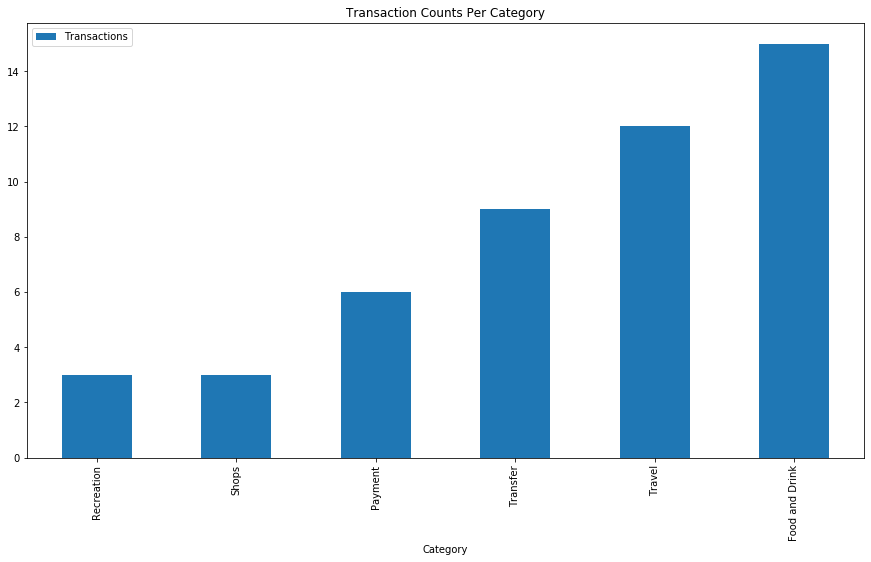

In [9]:
# Caculating expenses per category
# Could not make pie graph due to negative number in Recreation. Was not able to remove Recreation and create pie chart..
expenses = df.filter(['Category', 'Amount'])
group = expenses.groupby(['Category']).sum()
group.columns = ['Total Amount Per Category']
group.sort_values('Total Amount Per Category',ascending=False,inplace=True)
print(group)

group_1 = df.filter(['Category', 'Amount']).groupby(['Category']).count()
group_1.columns = ['Transactions']
group_1.sort_values('Transactions', ascending=True,inplace=True)
group_1.plot.bar(figsize=(15,8), title="Transaction Counts Per Category")
df.head()

In [10]:
# Caculating expenese for the month
new_amount = df.filter(['Date', 'Amount'])
new_amount.index = pd.to_datetime(new_amount.index)
month_grouped = new_amount.groupby(new_amount.index.month).sum()
month_grouped.sort_index()

,Amount
Date,
1,4084.83
2,10145.24
3,11145.24
4,6560.41


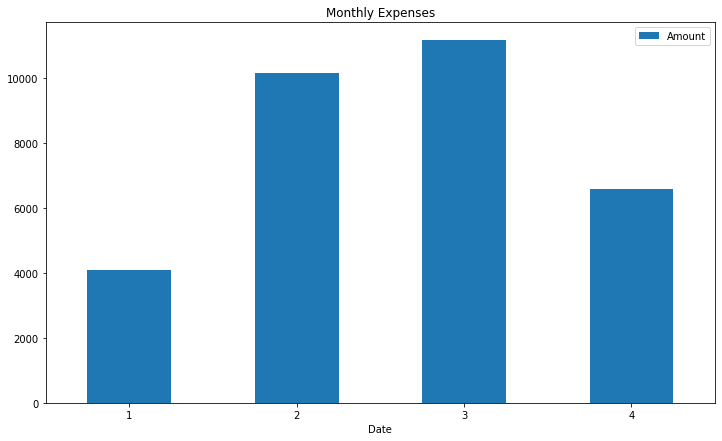

In [11]:
# Plotting and creating graph for data
month_grouped.plot(kind='bar',rot=0, title="Monthly Expenses", figsize=(12,7))